In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data
train = pd.read_csv(r"C:\Users\Anupa\Desktop\Learnby- Machine learning & AI\Statistics & Machine Learning_August 2020\PPT & CODE\Naive Bayes\Practise Code\har_train.csv")
test =  pd.read_csv(r"C:\Users\Anupa\Desktop\Learnby- Machine learning & AI\Statistics & Machine Learning_August 2020\PPT & CODE\Naive Bayes\Practise Code\har_validate.csv")

In [6]:
train.head(10)

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478
5,A,1.42,8.09,-94.4,3,0.02,0.0,-0.02,-22,3,...,36,0.02,0.00,-0.02,195,205,-215,-18,659,470
6,A,1.42,8.13,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,-0.02,0.00,193,205,-213,-9,660,474
7,A,1.43,8.16,-94.4,3,0.02,0.0,-0.02,-20,2,...,36,0.03,0.00,-0.02,193,204,-214,-16,653,476
8,A,1.45,8.18,-94.4,3,0.03,0.0,-0.02,-21,2,...,36,0.02,-0.02,-0.02,193,205,-214,-17,657,465
9,A,1.43,8.18,-94.4,3,0.02,0.0,-0.02,-22,2,...,36,0.02,0.02,-0.03,191,203,-215,-11,657,478


In [7]:
test.tail(5)

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
5880,E,156.0,-32.1,124.0,25,0.22,0.05,-0.28,74,52,...,36,1.38,-2.94,-0.48,-193,291,3,-683,152.0,555.0
5881,E,151.0,-33.8,127.0,23,0.35,0.02,-0.54,60,47,...,25,1.51,-2.18,-1.02,-241,33,-17,-377,-420.0,173.0
5882,E,148.0,-34.7,129.0,21,0.37,0.00,-0.62,49,25,...,27,1.75,-1.91,-0.38,-255,-50,-30,-226,-570.0,27.0
5883,E,147.0,-34.8,129.0,21,0.37,-0.02,-0.67,50,26,...,29,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0
5884,E,145.0,-35.3,130.0,19,0.39,-0.02,-0.67,47,15,...,29,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0


In [8]:
train.shape

(13737, 53)

In [9]:
test.shape

(5885, 53)

In [11]:
train.dtypes()

classe                   object
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_arm_z              int64
roll_dumbbell           float64
pitch_dumbbell          float64
yaw_dumbbell            float64
total_accel_dumbbell      int64
gyros_du

In [33]:
train.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,...,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,...,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,...,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,...,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
1%,-13.692000,-44.700000,-94.100000,2.000000,-0.580000,-0.190000,-0.890000,-50.000000,-11.000000,-237.000000,...,2.000000,-1.450000,-4.83000,-1.260000,-441.000000,-357.280000,-262.000000,-841.920000,-775.000000,-608.640000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.03000,0.080000,-57.000000,200.000000,-39.000000,-378.000000,595.000000,509.000000
99%,156.000000,28.000000,174.000000,25.000000,0.370000,0.220000,0.610000,60.000000,74.000000,54.000000,...,55.000000,1.640000,4.56000,1.652800,243.640000,502.000000,221.000000,639.000000,1240.000000,895.640000
max,162.000000,60.300000,179.000000,28.000000,2.220000,0.640000,1.620000,83.000000,164.000000,105.000000,...,73.000000,3.520000,6.13000,4.310000,477.000000,589.000000,291.000000,666.000000,1480.000000,1090.000000


In [32]:
test.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,...,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000
mean,64.183263,0.570192,-11.819918,11.300085,-0.007370,0.038595,-0.131028,-5.991674,30.160748,-72.232625,...,34.710110,0.153455,0.109031,0.172520,-61.453186,164.164316,-55.206797,-314.341206,380.992333,397.709245
std,62.713506,22.322734,94.776716,7.737757,0.208729,0.077766,0.240786,29.519482,28.621288,100.538973,...,9.978388,0.691182,4.601868,3.069053,181.377979,198.774834,138.165097,347.428437,504.646070,366.621586
min,-28.600000,-55.800000,-179.000000,1.000000,-0.980000,-0.450000,-1.460000,-81.000000,-38.000000,-275.000000,...,0.000000,-22.000000,-6.620000,-6.990000,-496.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-960.000000
25%,1.080000,1.930000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.490000,-0.180000,-178.000000,63.000000,-181.000000,-623.000000,17.000000,197.000000
50%,113.000000,5.360000,-14.300000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.030000,0.070000,-57.000000,202.000000,-43.000000,-380.000000,579.000000,517.000000
75%,123.000000,15.300000,7.390000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,28.000000,...,41.000000,0.560000,1.610000,0.480000,78.000000,312.000000,26.000000,-78.000000,736.000000,656.000000
max,162.000000,60.100000,179.000000,29.000000,2.020000,0.630000,1.440000,85.000000,149.000000,104.000000,...,108.000000,3.970000,311.000000,231.000000,365.000000,923.000000,254.000000,672.000000,1450.000000,1050.000000


In [34]:
# Missing Value Check
train.isnull().sum()

classe                  0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbell_z        0
accel_dumbbell_x        0
accel_dumbbell_y        0
accel_dumbbell_z        0
magnet_dumbbell_x       0
magnet_dumbb

In [50]:
# split dependent & independent variable
xtrain = train.drop('classe', axis=1)
ytrain = train.loc[:, 'classe']

xtest = test.drop('classe', axis=1)
ytest = test.loc[:, 'classe']

In [51]:
# Building the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
# Making Class Predictions
ypred=clf.predict(xtest)
print(pred[:150])

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'D' 'E' 'E' 'E' 'E'
 'D' 'C' 'C' 'C' 'D' 'C' 'D' 'D' 'D' 'D' 'D' 'E' 'E' 'E' 'E' 'E' 'E' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D']


In [65]:
# Model Evaluation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, ypred))
print("Accuracy:",metrics.accuracy_score(ypred, ytest))

# As it is multiclass classification problem hence we do have to mention avg criteria in argument
print("Precision",metrics.precision_score(ytest,ypred,average='macro'))
print("Recall",metrics.recall_score(ytest,ypred,average='macro'))

Accuracy: 0.5542905692438402
Accuracy: 0.5542905692438402
Precision 0.5503251310506854
Recall 0.5418202647803323



[[1070  127  223  102   51]
 [  95  685  106   35  239]
 [ 262  145  512  271   95]
 [ 212   76  136  441  143]
 [  35  106   49  115  554]]

              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885



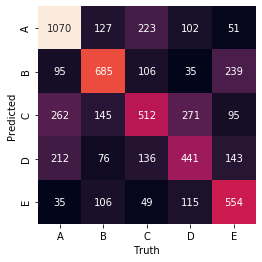

In [71]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred, ytest)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()
print()
print(metrics.confusion_matrix(ypred, ytest, labels=["A", "B", "C","D","E"]))
print()
print(metrics.classification_report(pred, ytest, labels=["A", "B", "C","D","E"]))
